# Importing Libraries


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# Loading Data Set

In [124]:
#using locally stored dataset
#df=pd.read_csv('data/RTA Dataset.csv')

In [125]:
#load the data from the github repo
df=pd.read_csv('https://raw.githubusercontent.com/Teshager21/accident-analysis-addis_ababa/refs/heads/main/data/RTA%20Dataset.csv')

In [126]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Exploratory Data Analysis

### <i>Intial Exploration</i>

In [127]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [128]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [129]:
df.shape

(12316, 32)

In [130]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [131]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

In [132]:
df.rename(columns=col_map,inplace=True)
df.columns

Index(['time', 'day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [135]:
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


<b>Missing Values</b>

In [136]:
df.isna().sum().sort_values(ascending=False)[df.isna().sum()>0]

vehicle_defect             4427
service_year               3928
casualty_work              3198
casualty_fitness           2635
vehicle_type                950
junction_type               887
driving_experience          829
educational_level           741
vehicle_driver_relation     579
vehicle_owner               482
lanes                       385
vehicle_movement            308
accident_area               239
surface_type                172
collision_type              155
road_allignment             142
dtype: int64

In [137]:
df.isin(['Unknown','unkown']).sum().sort_values(ascending=False)[df.isin(['Unknown','unkown']).sum()>0]

service_year               2883
driver_age                 1548
weather_condition           292
junction_type               191
driver_sex                  178
educational_level           100
vehicle_movement             88
lanes                        57
accident_cause               25
accident_area                22
casualty_work                19
collision_type               14
vehicle_driver_relation      14
dtype: int64

In [138]:
#replace 'unknown's with NaN
df.replace('Unknown',np.nan, inplace=True)

In [139]:
#check if there are remains 'unknown's
df.isin(['Unknown','unkown']).sum().sort_values(ascending=False)[df.isin(['Unknown','unkown']).sum()>0]

Series([], dtype: int64)

In [140]:
missing_percentages=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_percentages[missing_percentages>0]

service_year               55.302046
vehicle_defect             35.945112
casualty_work              26.120494
casualty_fitness           21.394933
driver_age                 12.569016
junction_type               8.752842
vehicle_type                7.713543
educational_level           6.828516
driving_experience          6.731082
vehicle_driver_relation     4.814875
vehicle_owner               3.913608
lanes                       3.588828
vehicle_movement            3.215330
weather_condition           2.370900
accident_area               2.119195
driver_sex                  1.445274
surface_type                1.396557
collision_type              1.372199
road_allignment             1.152972
accident_cause              0.202988
dtype: float64

<b>Missingness</b>

<Axes: >

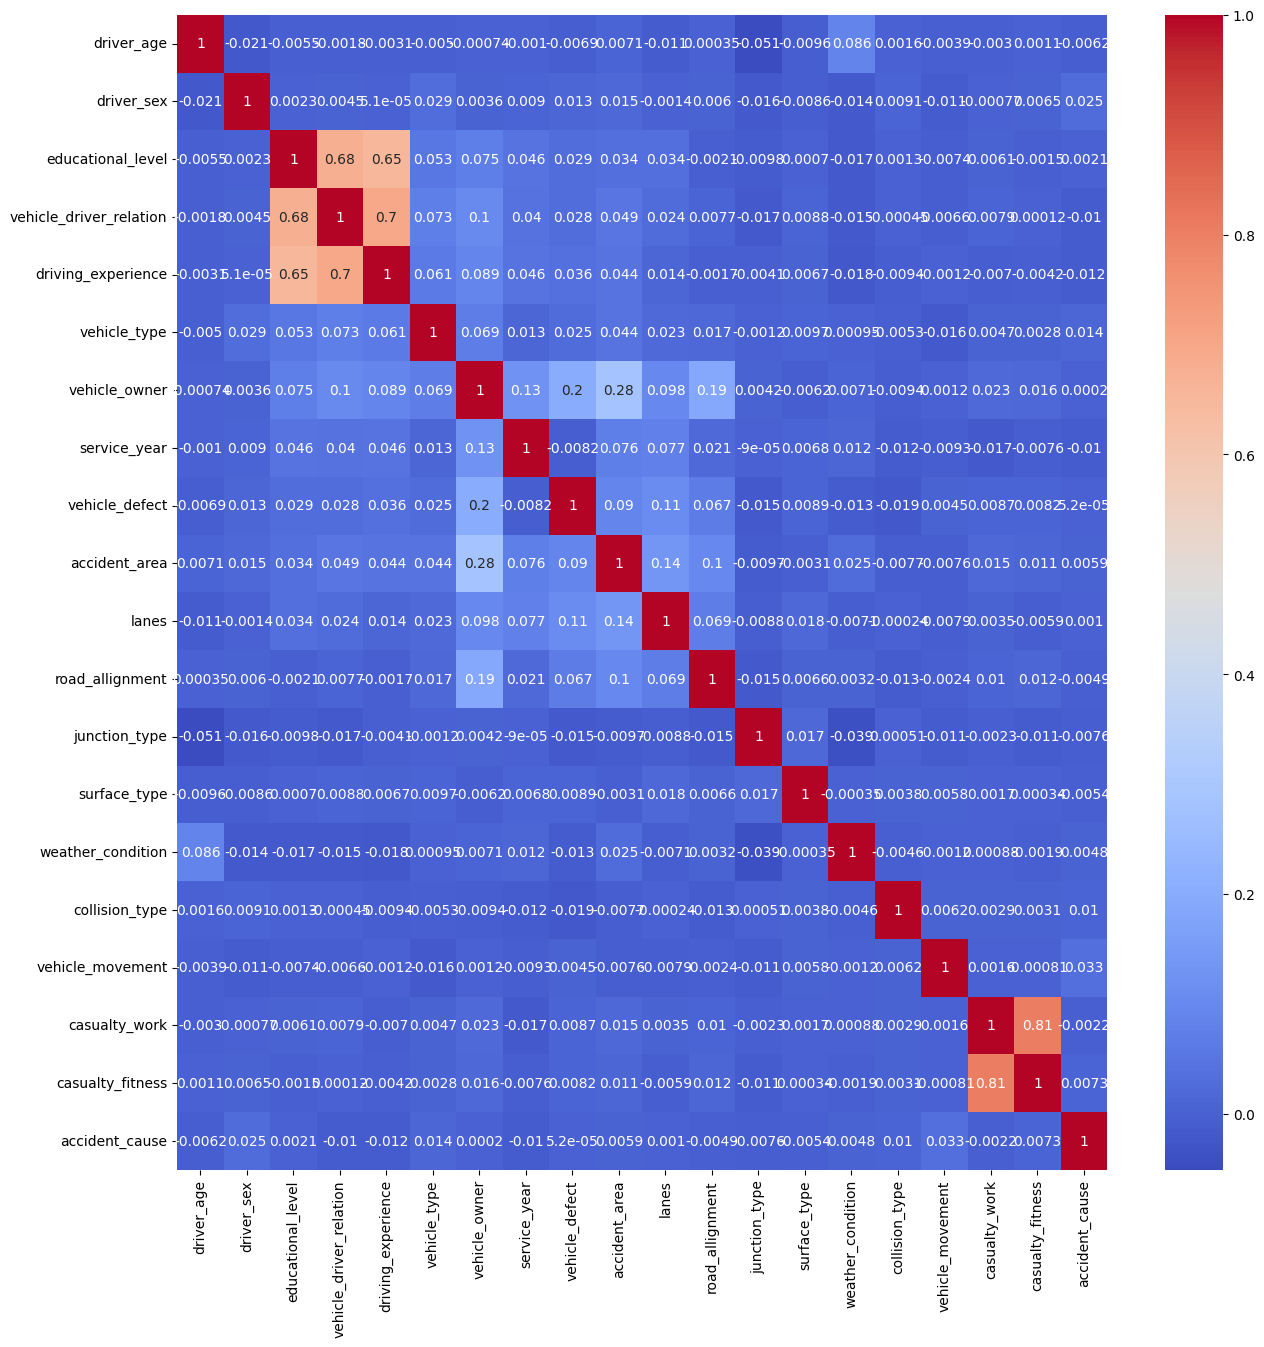

In [141]:
missingness=df.isnull().astype(int)
missingness=missingness.loc[:,(missingness.sum(axis=0)>0)]
correlation_matrix=missingness.corr()
# Increase plot size
plt.figure(figsize=(15, 15)) 
sns.heatmap(correlation_matrix ,annot=True,cmap='coolwarm')

Text(0, 0.5, 'Columns')

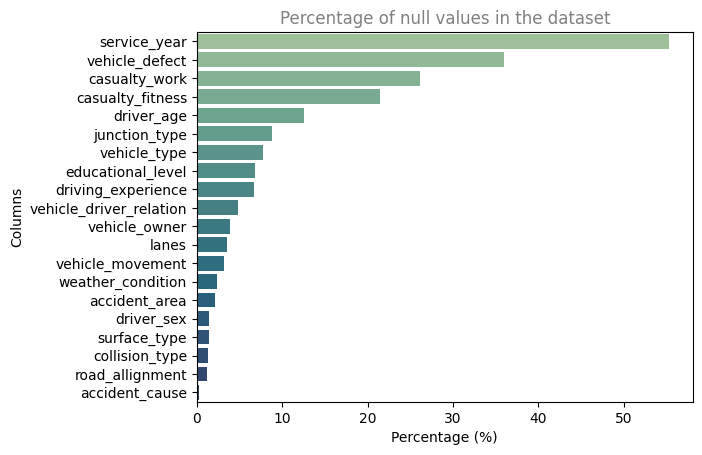

In [142]:
sns.barplot(y=missing_percentages[missing_percentages>0].index,
            x=missing_percentages[missing_percentages>0],
            hue=missing_percentages[missing_percentages>0].index,
            palette="crest")
plt.title(label="Percentage of null values in the dataset",color='gray')
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")

In [143]:
#Identify columns with na values
columns_with_na= [x for x in df if df[x].isna().sum()>0]
df[columns_with_na]

,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,lanes,road_allignment,junction_type,surface_type,weather_condition,collision_type,vehicle_movement,casualty_work,casualty_fitness,accident_cause
0,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Normal,Collision with roadside-parked vehicles,Going straight,NaN,NaN,Moving Backward
1,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Normal,Vehicle with vehicle collision,Going straight,NaN,NaN,Overtaking
2,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Normal,Collision with roadside objects,Going straight,Driver,NaN,Changing lane to the left
3,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Normal,Vehicle with vehicle collision,Going straight,Driver,Normal,Changing lane to the right
4,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Normal,Vehicle with vehicle collision,Going straight,NaN,NaN,Overtaking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Normal,Vehicle with vehicle collision,Going straight,Driver,Normal,No distancing
12312,NaN,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Normal,Vehicle with vehicle collision,Other,Driver,Normal,No distancing
12313,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Normal,Vehicle with vehicle collision,Other,Driver,Normal,Changing lane to the right
12314,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Normal,Vehicle with vehicle collision,Other,Driver,Normal,Driving under the influence of drugs


In [144]:
#time
df['time']=pd.to_datetime(df['time'],format='%H:%M:%S')
df['hour']=df['time'].dt.hour
df['minute']=df['time'].dt.minute
df[['time','hour','minute']].head()

,time,hour,minute
0,1900-01-01 17:02:00,17,2
1,1900-01-01 17:02:00,17,2
2,1900-01-01 17:02:00,17,2
3,1900-01-01 01:06:00,1,6
4,1900-01-01 01:06:00,1,6


array([[<Axes: title={'center': 'vehicles_involved'}>,
        <Axes: title={'center': 'casualties'}>]], dtype=object)

<Figure size 2000x2000 with 0 Axes>

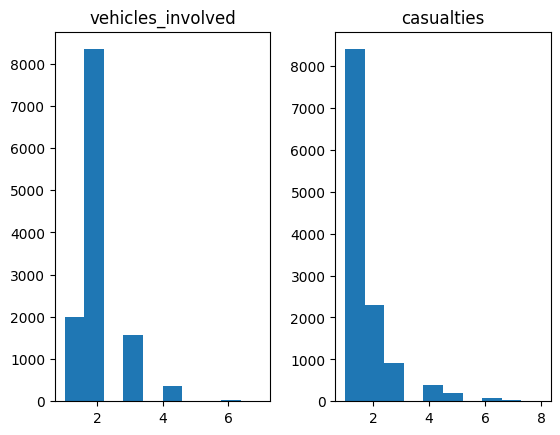

In [145]:
plt.figure(figsize=(20,20))
plt.tight_layout()
df.drop(['hour','minute','time'],axis=1).hist(grid=False)


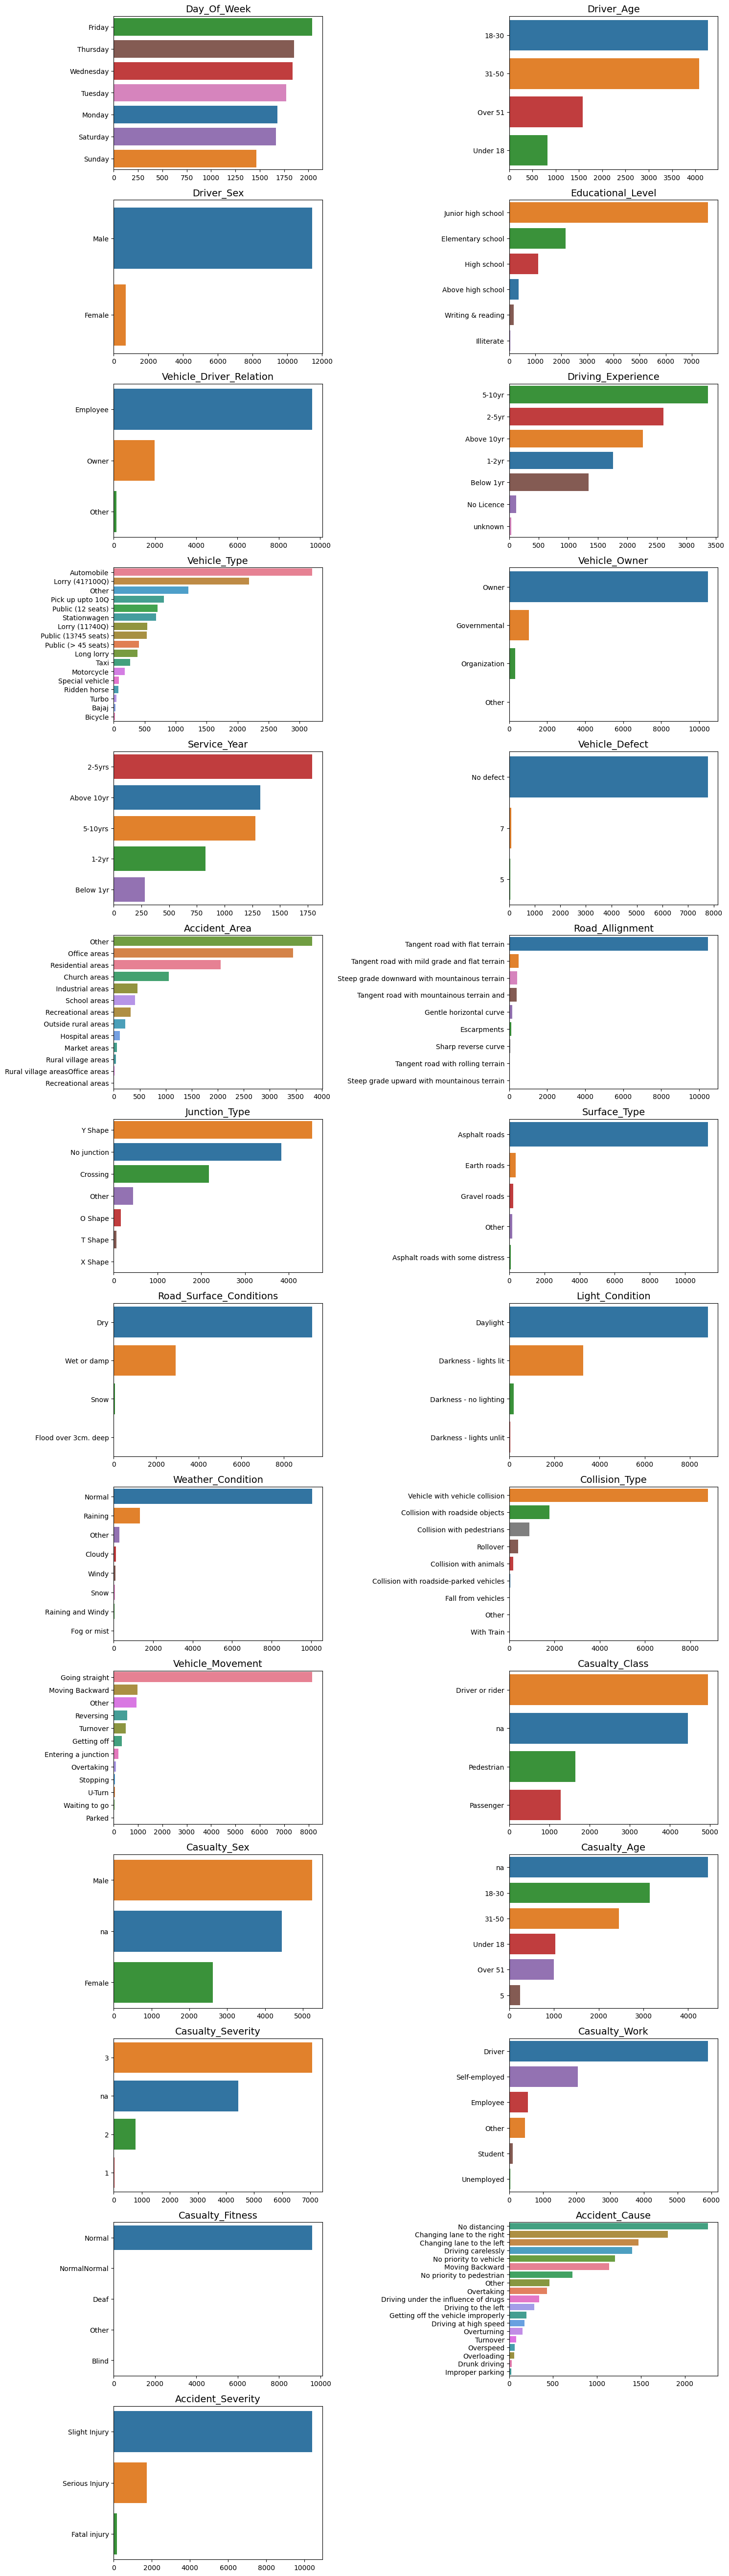

In [146]:
plt.figure(figsize=(15,60))
plotnumber=1
for col in df.drop(['pedestrian_movement','lanes','time','casualties','vehicles_involved','hour','minute'],axis=1):
    ax1 = plt.subplot(16,2,plotnumber)
    if plotnumber <= df.shape[1]:
        order=df[col].value_counts().index.tolist()
        sns.countplot(data=df,y=col,hue=col,legend=False,order=order)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(col.title(),fontsize=14)
    plotnumber+=1
plt.tight_layout()

**Encoding**

In [147]:
#segreggate nominal and ordinal features
nominal_features=['day_of_week', 'driver_sex',
       'vehicle_driver_relation', 'vehicle_type',
       'vehicle_owner', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_fitness',
       'casualty_work', 'pedestrian_movement',
       'accident_cause']
ordinal_features=['driver_age', 'educational_level', 'driving_experience', 'service_year', 'casualty_age', 'accident_severity']

In [148]:
# df['casualties'].unique()
len(nominal_features)+len(ordinal_features)
for col in ordinal_features:
    print(col ," : ",df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' nan]
educational_level  :  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
service_year  :  ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
casualty_age  :  ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [149]:
#Nominal Encoding
label_encoder = LabelEncoder()
for col in nominal_features:
    
    non_nan_mask = df[col].notna()  # Mask for non-NaN values
    col_name=col + '_en'
    df.loc[non_nan_mask, col_name] = label_encoder.fit_transform(df.loc[non_nan_mask, col])
    df[col_name] = df[col_name].fillna(np.nan)
    df.drop(columns=[col],inplace=True)
len(df.columns)


34

In [150]:
#Ordinal Encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
columns_to_encode = ordinal_features
for col in columns_to_encode:
    df[col] = df[col].fillna('missing')
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[[col]])
for col in columns_to_encode:
    missing_encoded_value = encoder.transform([['missing']])[0][0]
    df[col] = df[col].replace(missing_encoded_value, np.nan)

df.head()




c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analy

,time,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,...,light_condition_en,weather_condition_en,collision_type_en,vehicle_movement_en,casualty_class_en,casualty_sex_en,casualty_fitness_en,casualty_work_en,pedestrian_movement_en,accident_cause_en
0,1900-01-01 17:02:00,0.0,0.0,0.0,3.0,2,2,5.0,na,2.0,...,3.0,2.0,3.0,2.0,3.0,2.0,NaN,NaN,5.0,9.0
1,1900-01-01 17:02:00,1.0,4.0,3.0,2.0,2,2,5.0,na,2.0,...,3.0,2.0,7.0,2.0,3.0,2.0,NaN,NaN,5.0,16.0
2,1900-01-01 17:02:00,0.0,4.0,0.0,5.0,2,2,1.0,3,1.0,...,3.0,2.0,2.0,2.0,0.0,1.0,NaN,0.0,5.0,0.0
3,1900-01-01 01:06:00,0.0,4.0,2.0,5.0,2,2,0.0,3,2.0,...,0.0,2.0,7.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0
4,1900-01-01 01:06:00,0.0,4.0,1.0,2.0,2,2,5.0,na,2.0,...,0.0,2.0,7.0,2.0,3.0,2.0,NaN,NaN,5.0,16.0


In [151]:
df.dtypes

time                          datetime64[ns]
driver_age                           float64
educational_level                    float64
driving_experience                   float64
service_year                         float64
vehicles_involved                      int64
casualties                             int64
casualty_age                         float64
casualty_severity                     object
accident_severity                    float64
hour                                   int32
minute                                 int32
day_of_week_en                       float64
driver_sex_en                        float64
vehicle_driver_relation_en           float64
vehicle_type_en                      float64
vehicle_owner_en                     float64
vehicle_defect_en                    float64
accident_area_en                     float64
lanes_en                             float64
road_allignment_en                   float64
junction_type_en                     float64
surface_ty

<b>Duplicated Values</b>

In [152]:
print(df.duplicated().sum())

0


<b>#Unique Values per Columns</b>

In [153]:
df.nunique().sort_values(ascending=False)

time                          1074
minute                          60
hour                            24
accident_cause_en               19
vehicle_type_en                 17
accident_area_en                13
vehicle_movement_en             12
pedestrian_movement_en           9
road_allignment_en               9
collision_type_en                9
casualties                       8
weather_condition_en             8
driving_experience               8
junction_type_en                 7
educational_level                7
day_of_week_en                   7
casualty_work_en                 6
service_year                     6
vehicles_involved                6
lanes_en                         6
casualty_age                     6
driver_age                       5
surface_type_en                  5
casualty_fitness_en              5
casualty_severity                4
vehicle_owner_en                 4
light_condition_en               4
road_surface_conditions_en       4
casualty_class_en   

<b>Unique Values per Columns</b>

In [154]:
uniques=[]
for i in df.columns:
     uniques.append(df[i].unique())
uniques_df=pd.Series(data=uniques,index=df.columns)
uniques_df

time                          [1900-01-01 17:02:00, 1900-01-01 01:06:00, 190...
driver_age                                            [0.0, 1.0, 3.0, 2.0, 4.0]
educational_level                           [0.0, 4.0, 6.0, 1.0, 2.0, 3.0, 5.0]
driving_experience                     [0.0, 3.0, 2.0, 1.0, 6.0, 5.0, 4.0, 7.0]
service_year                                     [3.0, 2.0, 5.0, 0.0, 1.0, 4.0]
vehicles_involved                                            [2, 1, 3, 6, 4, 7]
casualties                                             [2, 1, 3, 4, 6, 5, 8, 7]
casualty_age                                     [5.0, 1.0, 0.0, 4.0, 3.0, 2.0]
casualty_severity                                                 [na, 3, 2, 1]
accident_severity                                               [2.0, 1.0, 0.0]
hour                          [17, 1, 14, 22, 8, 15, 12, 18, 13, 20, 16, 21,...
minute                        [2, 6, 15, 30, 20, 40, 45, 10, 11, 36, 35, 25,...
day_of_week_en                          

In [155]:
#time
df['time']=pd.to_datetime(df['time'],format='%H:%M:%S')
df['hour']=df['time'].dt.hour
df['minute']=df['time'].dt.minute
df[['time','hour','minute']].head()

,time,hour,minute
0,1900-01-01 17:02:00,17,2
1,1900-01-01 17:02:00,17,2
2,1900-01-01 17:02:00,17,2
3,1900-01-01 01:06:00,1,6
4,1900-01-01 01:06:00,1,6


In [156]:
df.dtypes

time                          datetime64[ns]
driver_age                           float64
educational_level                    float64
driving_experience                   float64
service_year                         float64
vehicles_involved                      int64
casualties                             int64
casualty_age                         float64
casualty_severity                     object
accident_severity                    float64
hour                                   int32
minute                                 int32
day_of_week_en                       float64
driver_sex_en                        float64
vehicle_driver_relation_en           float64
vehicle_type_en                      float64
vehicle_owner_en                     float64
vehicle_defect_en                    float64
accident_area_en                     float64
lanes_en                             float64
road_allignment_en                   float64
junction_type_en                     float64
surface_ty

### <i>Univariate Analysis</i>

### <i>Bivariate Analysis</i>

### <i>Multivariate Analysis</i>

# Preprocessing

### <i>Data Cleaning</i>

### <i>Data Integration</i>

### <i>Data Transformation</i>

### <i>Data Reduction</i>

### <i>Data Discretization and Concpet Heirarchy Generation</i>

# Insights and Recommendations